In [12]:
!pip install textblob

In [13]:
!pip install wordcloud

In [19]:
import pandas as pd
import numpy as np

import re
import nltk

nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\valiavee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
!pip install spacy

In [3]:
tweet = pd.read_csv('Elon_musk.csv')
tweet

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
del tweet['Unnamed: 0']
tweet

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
corpus = []
ps = PorterStemmer()

In [10]:
for i in range(0, len(tweet)):
    review = re.sub('[^a-zA-Z]', ' ',tweet.Text[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
corpus

['kunalb alien',
 'id aa carmack ray trace cyberpunk hdr next level tri',
 'joerogan spotifi great interview',
 'gtera doge underestim',
 'teslacn congratul tesla china amaz execut last year next even',
 'happi new year ox http co wfkmyu oj',
 'frodo underdog thought would fail http co zgxjfdzzrm',
 'owenspark flcnhvi anonyx haha thank',
 'flcnhvi anonyx inde tweet definit repres real world time alloc',
 'entertain outcom like',
 'givedirectli sent',
 'agre clubhous kanyewest',
 'http co rwe uhst',
 'geoffkeighley unrealengin get real',
 'bought dogecoin lil x toddler hodler',
 'joshmanmod definit issu sentenc seem bit high',
 'freewalletorg thank fix',
 'freewalletorg pleas unlock account',
 'astrojordi u f u f',
 'true power haha http co fc uhqsd',
 'freewalletorg crypto wallet give privat key avoid cost',
 'freewalletorg app suck',
 'rt spacex nasa select falcon heavi launch first two element lunar gateway togeth one mission http co pwt',
 'ajtourvil ye',
 'blkmdl rationaletienn ada

In [11]:
sent_df = pd.DataFrame(corpus, columns=['sentence'])
sent_df

,sentence
0,kunalb alien
1,id aa carmack ray trace cyberpunk hdr next lev...
2,joerogan spotifi great interview
3,gtera doge underestim
4,teslacn congratul tesla china amaz execut last...
...,...
7991,flcnhvi true sound surreal neg propaganda stil...
7992,ppathol make sure read ur term amp condit clic...
7993,teslagong ppathol samwis gamge
7994,ppathol altho dumb dumber u f u f


In [16]:
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["sentence"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

sent_df[['subjectivity','polarity']] = sent_df.apply(sentiment_analysis, axis=1)
sent_df

,sentence,subjectivity,polarity
0,kunalb alien,0.750000,-0.250000
1,id aa carmack ray trace cyberpunk hdr next lev...,0.000000,0.000000
2,joerogan spotifi great interview,0.750000,0.800000
3,gtera doge underestim,0.000000,0.000000
4,teslacn congratul tesla china amaz execut last...,0.033333,0.000000
...,...,...,...
7991,flcnhvi true sound surreal neg propaganda stil...,0.443333,0.186667
7992,ppathol make sure read ur term amp condit clic...,0.888889,0.500000
7993,teslagong ppathol samwis gamge,0.000000,0.000000
7994,ppathol altho dumb dumber u f u f,0.500000,-0.375000


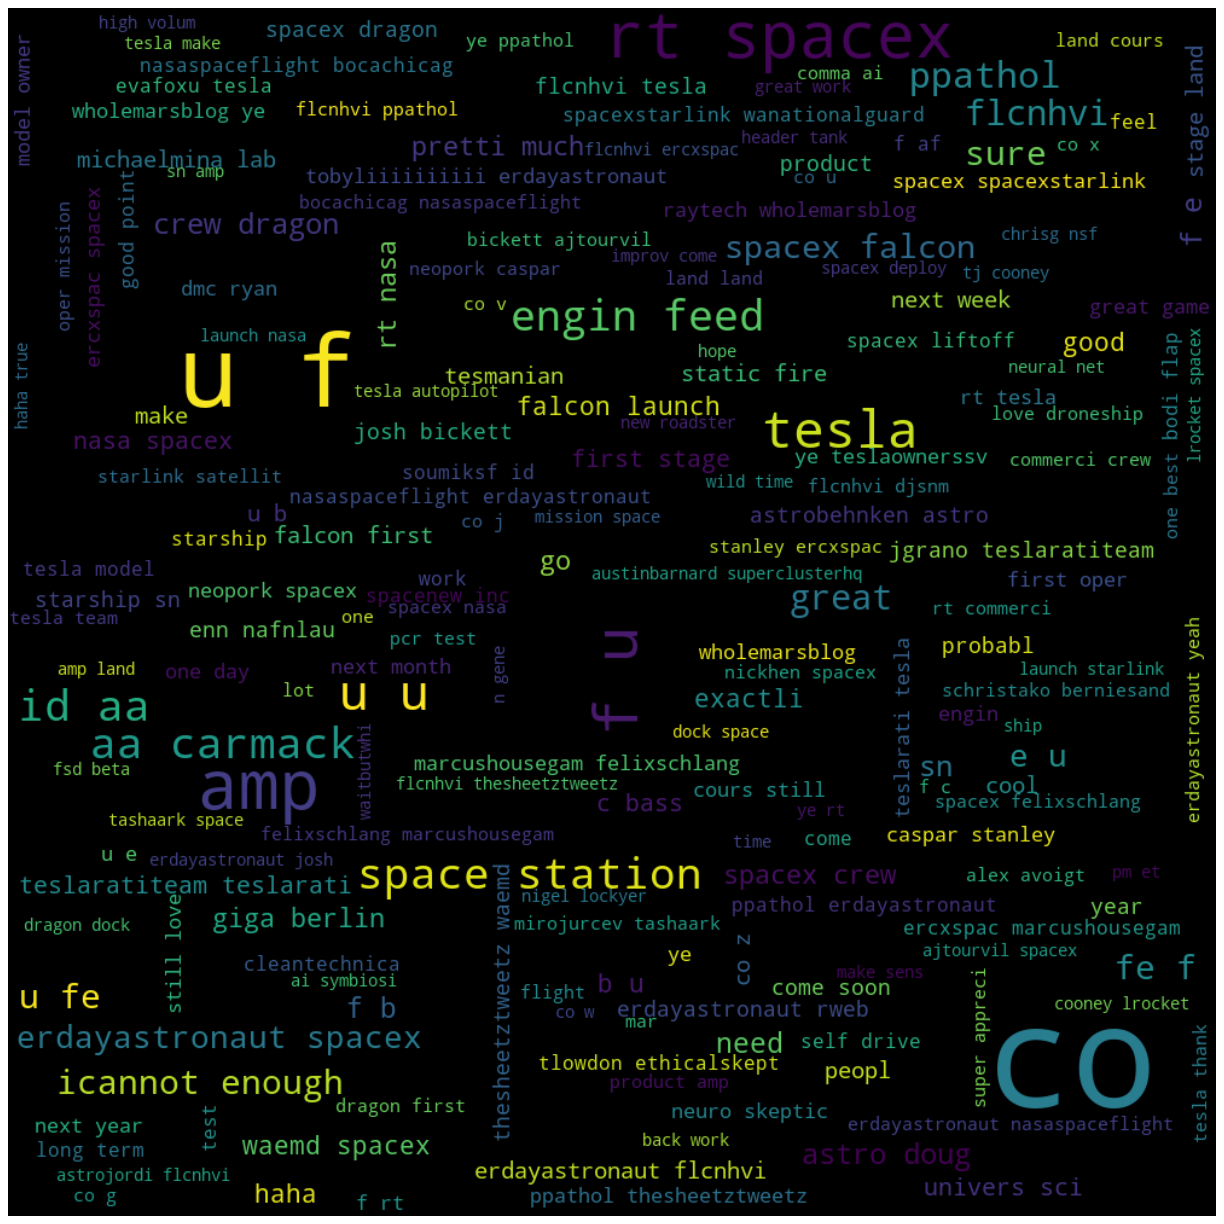

In [20]:
from wordcloud import WordCloud

allwords = " ".join([twts for twts in sent_df["sentence"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


In [21]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
sent_df["analysis"] = sent_df["polarity"].apply(analysis)

sent_df

,sentence,subjectivity,polarity,analysis
0,kunalb alien,0.750000,-0.250000,Negative
1,id aa carmack ray trace cyberpunk hdr next lev...,0.000000,0.000000,Neutral
2,joerogan spotifi great interview,0.750000,0.800000,Positive
3,gtera doge underestim,0.000000,0.000000,Neutral
4,teslacn congratul tesla china amaz execut last...,0.033333,0.000000,Neutral
...,...,...,...,...
7991,flcnhvi true sound surreal neg propaganda stil...,0.443333,0.186667,Positive
7992,ppathol make sure read ur term amp condit clic...,0.888889,0.500000,Positive
7993,teslagong ppathol samwis gamge,0.000000,0.000000,Neutral
7994,ppathol altho dumb dumber u f u f,0.500000,-0.375000,Negative


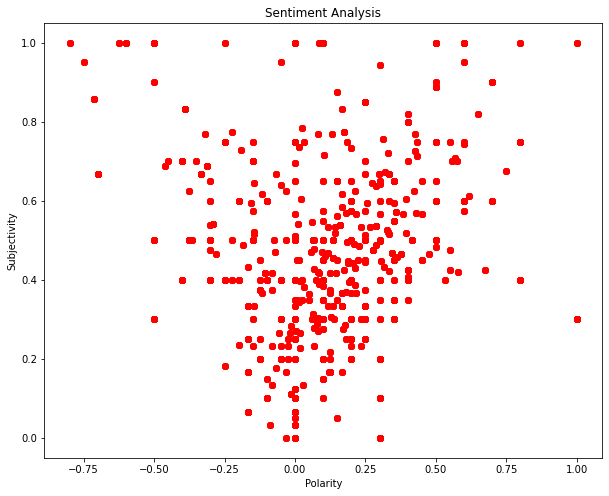

In [22]:
plt.figure(figsize=(10, 8))

for i in range(0, sent_df.shape[0]):
    plt.scatter(sent_df["polarity"][i], sent_df["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph